In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import random
from sklearn.preprocessing import LabelEncoder


In [2]:
df = pd.read_csv("../data/raw/data.csv") 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

##### Finding the percentage of missimg values in the data

In [4]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing

,Total,Percent
Credit_History,50,0.081433
Self_Employed,32,0.052117
LoanAmount,22,0.035831
Dependents,15,0.024430
Loan_Amount_Term,14,0.022801
Gender,13,0.021173
Married,3,0.004886
Loan_ID,0,0.000000
Education,0,0.000000
ApplicantIncome,0,0.000000


Number of unique values in each of the categorical variables

In [5]:
df[df.columns[1:]].describe(include='object')

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,601,611,599,614,582,614,614
unique,2,2,4,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Y
freq,489,398,345,480,500,233,422


In [6]:
for col in df.select_dtypes(include='object').columns[1:]:
    print(df[col].value_counts())
    print('')

Male      489
Female    112
Name: Gender, dtype: int64

Yes    398
No     213
Name: Married, dtype: int64

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

No     500
Yes     82
Name: Self_Employed, dtype: int64

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

Y    422
N    192
Name: Loan_Status, dtype: int64



##### Distribution analysis

In [7]:
def plot_histogram(df,col,bins=20):
    fig,ax = plt.subplots(figsize=(12,8))
    ax.hist(df[col].dropna(), bins=bins)
    ax.set_title(col)
    ax.set_ylabel('frequency')
    ax.set_xlabel(col)
    plt.show()

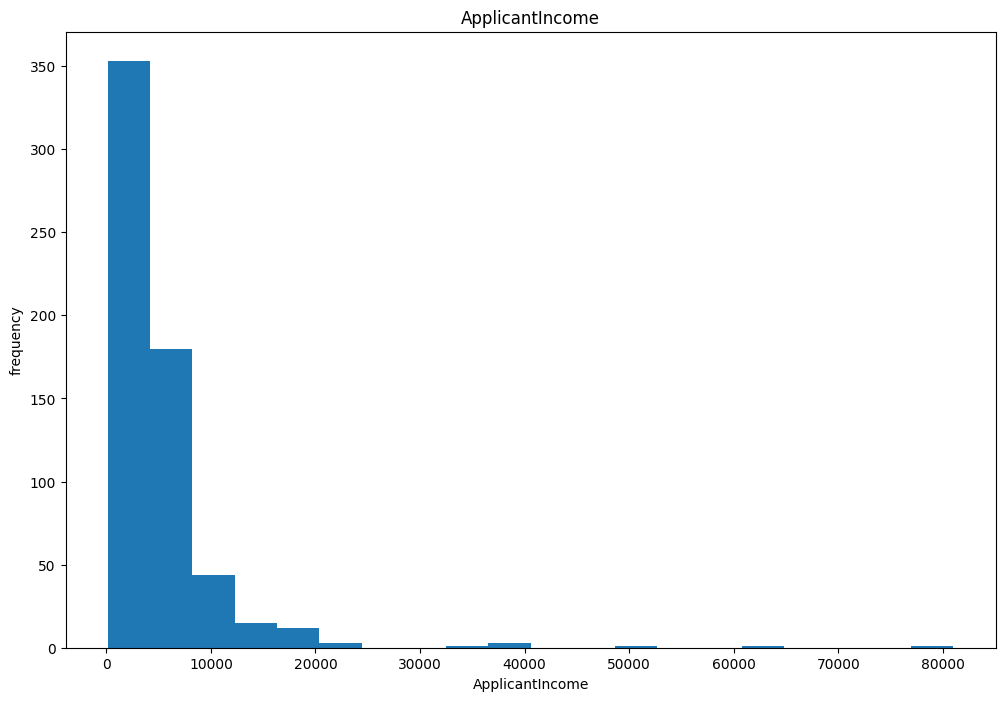

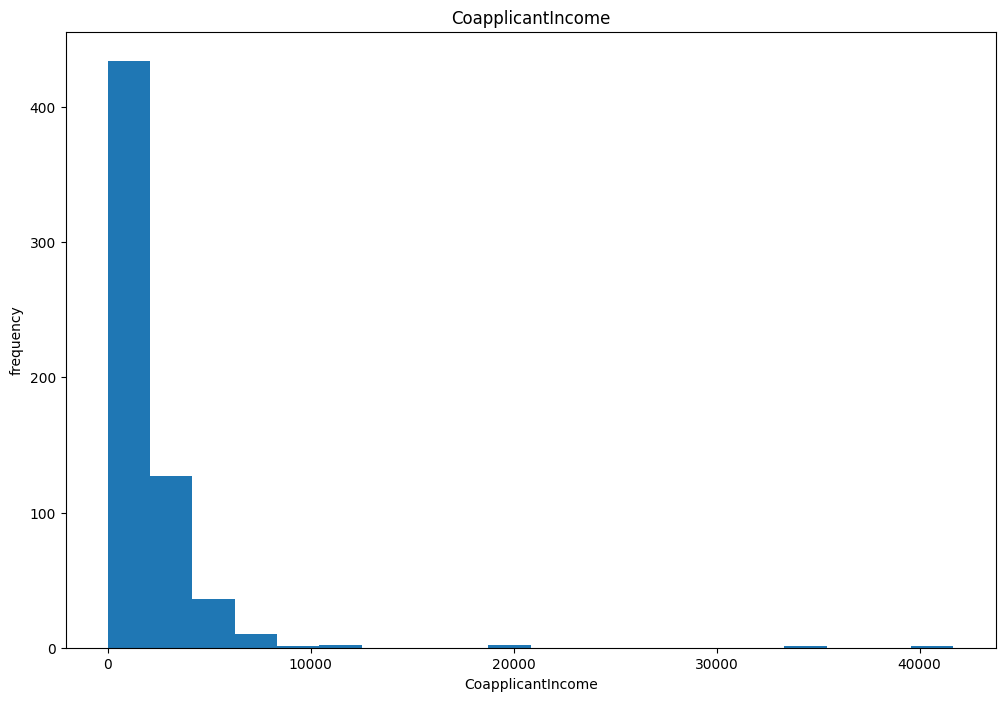

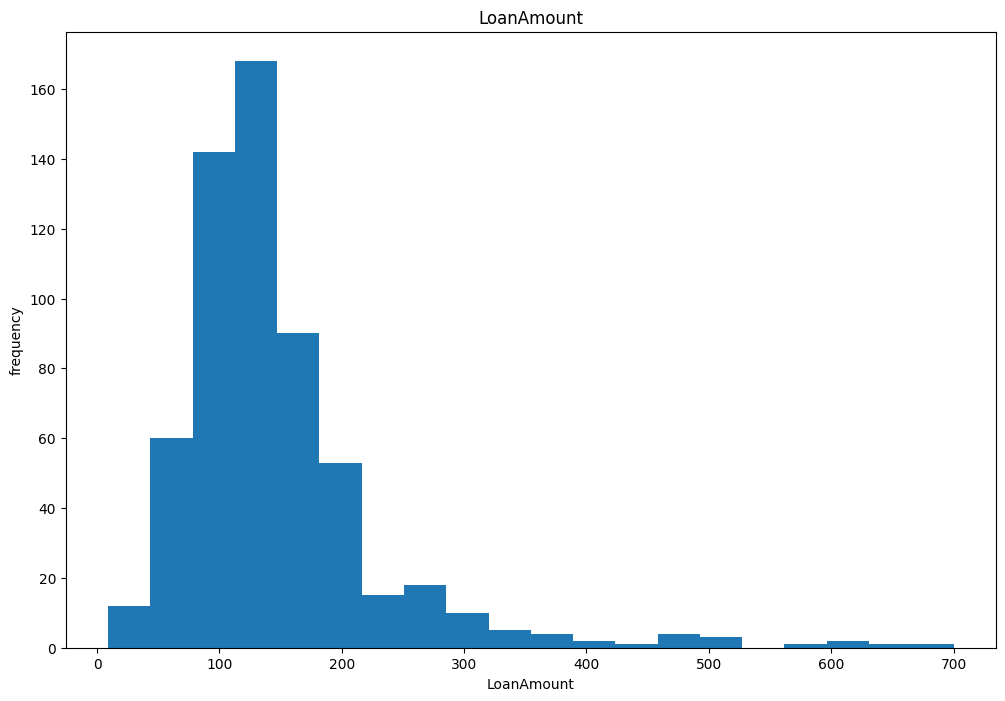

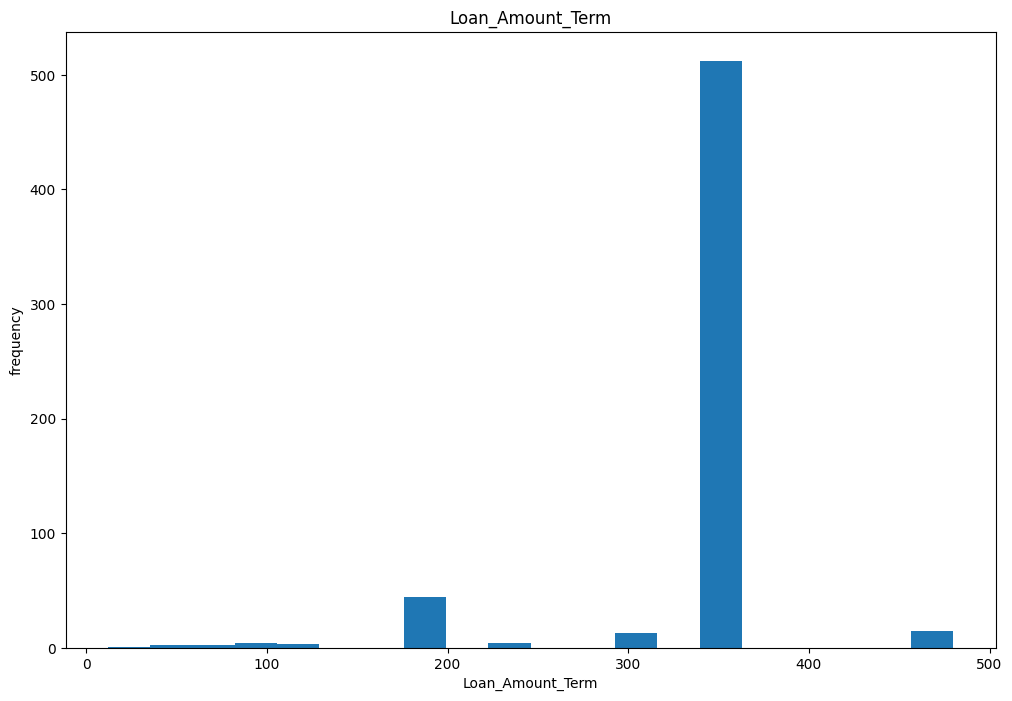

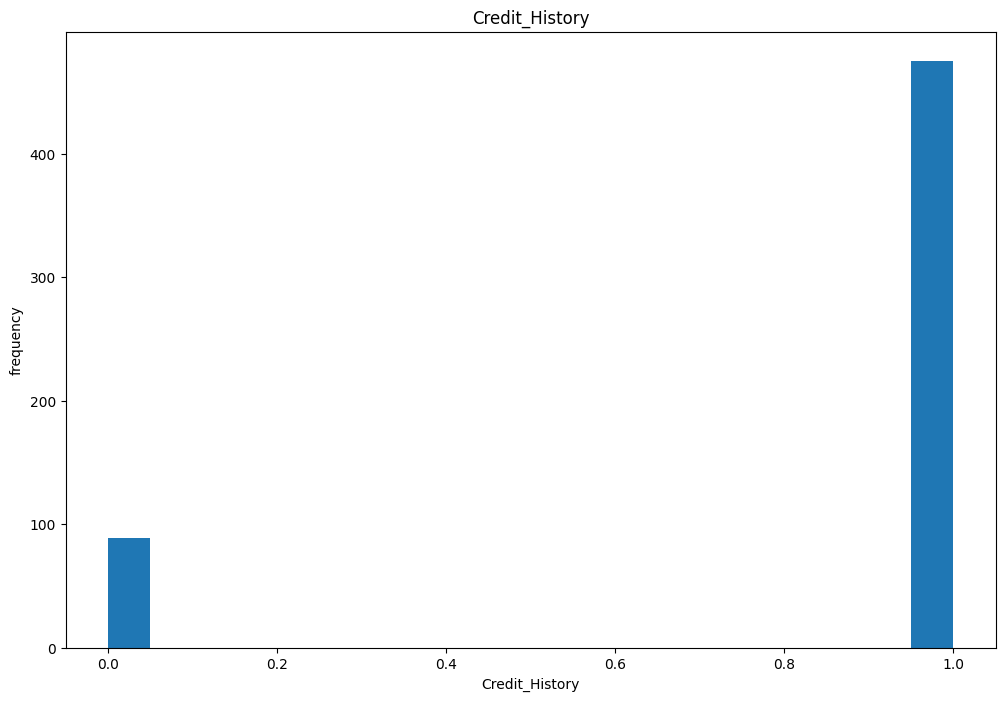

In [8]:
bins = 20
for col in df.select_dtypes(include='number'):
    plot_histogram(df,col,bins=bins)

<AxesSubplot: >

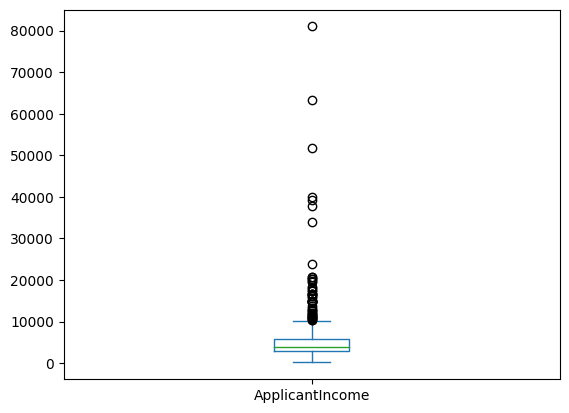

In [9]:
df.ApplicantIncome.plot.box()

<AxesSubplot: >

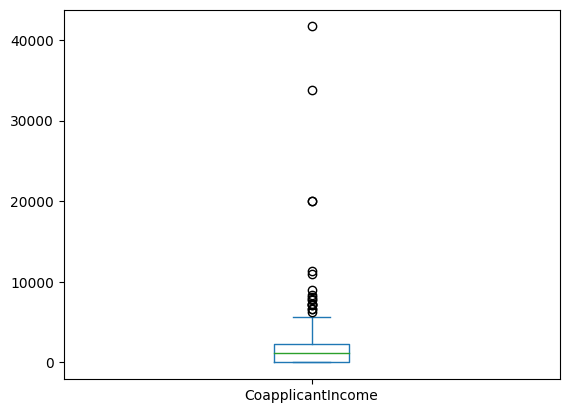

In [10]:
df.CoapplicantIncome.plot.box()

<AxesSubplot: >

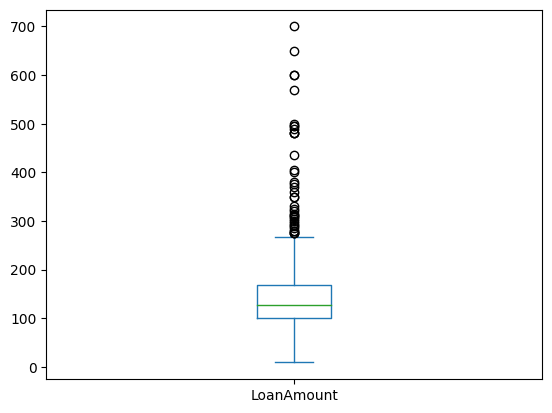

In [11]:
df.LoanAmount.plot.box()

##### Visualization of effect of other features on loan status

<AxesSubplot: xlabel='Gender,Married'>

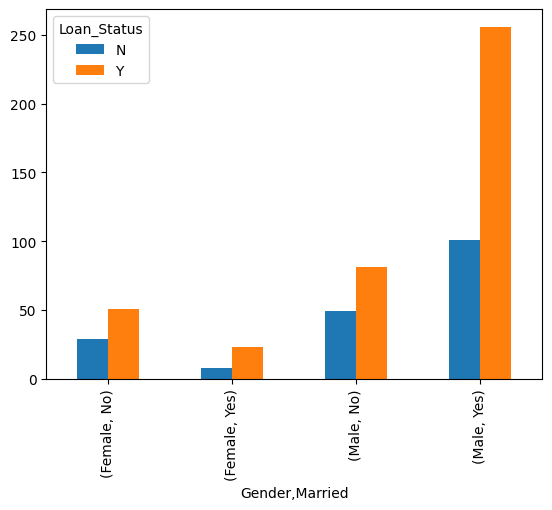

In [12]:
df.groupby(['Gender','Married','Loan_Status'])['Loan_Status'].count().unstack('Loan_Status').plot.bar()

<AxesSubplot: xlabel='Gender,Education'>

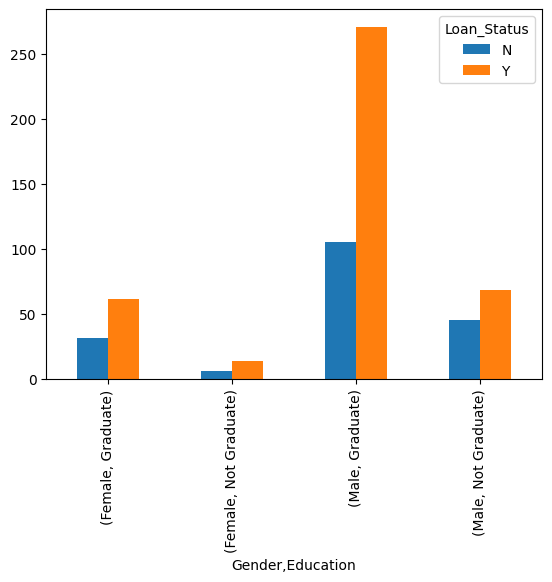

In [13]:
df.groupby(['Gender','Education','Loan_Status'])['Loan_Status'].count().unstack('Loan_Status').plot.bar()

<AxesSubplot: xlabel='Credit_History'>

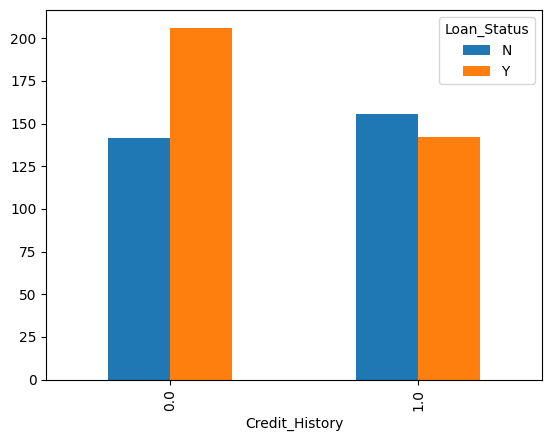

In [14]:
df.groupby(['Credit_History','Loan_Status'])['LoanAmount'].mean().unstack('Loan_Status').plot.bar()

<AxesSubplot: xlabel='Loan_Amount_Term'>

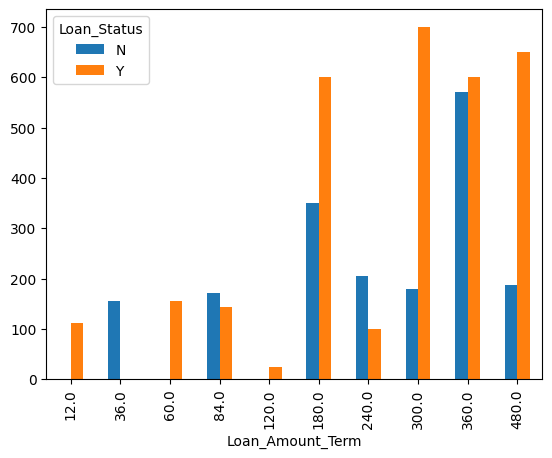

In [15]:
df.groupby(['Loan_Amount_Term','Loan_Status'])['LoanAmount'].max().unstack('Loan_Status').plot.bar()

<AxesSubplot: xlabel='Property_Area'>

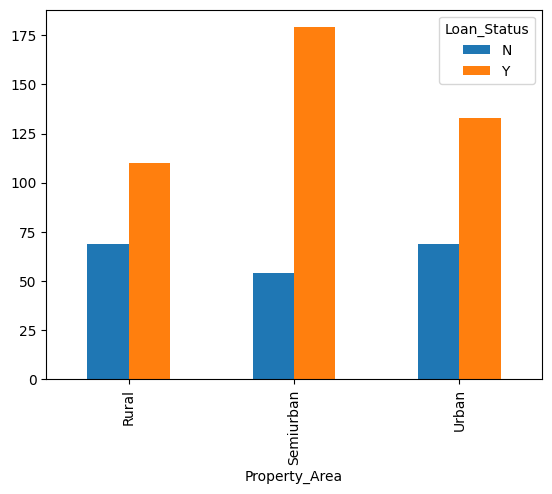

In [16]:
df.groupby(['Property_Area','Loan_Status'])['Loan_Status'].count().unstack('Loan_Status').plot.bar()

<AxesSubplot: xlabel='Property_Area'>

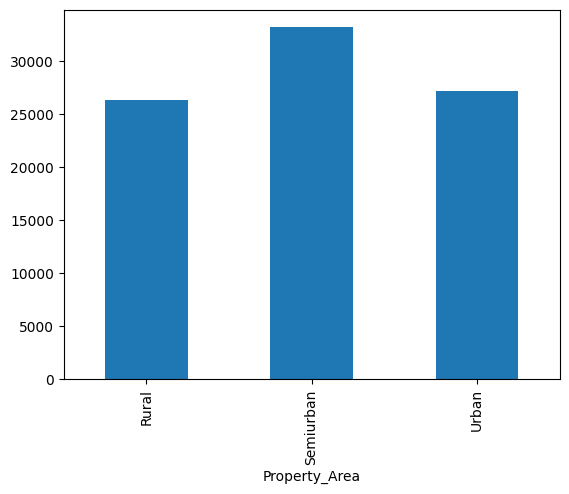

In [17]:
df.groupby(['Property_Area'])['LoanAmount'].sum().plot.bar()

##### Filling missing values

In [18]:
df.Dependents.fillna(df.Dependents.mode()[0],inplace=True)
df.Loan_Amount_Term.fillna(df.Loan_Amount_Term.mode()[0],inplace=True)
df.Gender.fillna(df.Gender.mode()[0],inplace=True)
df.Married.fillna(df.Married.mode()[0],inplace=True)
df.Self_Employed.fillna(df.Self_Employed.mode()[0],inplace=True)
df.LoanAmount.fillna(df.LoanAmount.median(),inplace=True)

In [19]:
df.loc[ (pd.isnull(df['Credit_History'])) & (df['Loan_Status'] == 'Y'), 'Credit_History'] = 1
df.loc[ (pd.isnull(df['Credit_History'])) & (df['Loan_Status'] == 'N'), 'Credit_History'] = 0

In [20]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [21]:
df.to_csv("../data/processed/cleaned_data.csv",index=False)

In [22]:
df['gender']=LabelEncoder().fit_transform(df.Gender)
df['maritalstatus']=LabelEncoder().fit_transform(df.Married)
df['education']=LabelEncoder().fit_transform(df.Education)
df['selfemployed']=LabelEncoder().fit_transform(df.Self_Employed)
df['area']=LabelEncoder().fit_transform(df.Property_Area)
df['loanstatus']=LabelEncoder().fit_transform(df.Loan_Status)


In [23]:
df["Dependents"].replace({"3+": "3"}, inplace=True)

In [24]:
df['log_income']=np.log(df['ApplicantIncome']+df['CoapplicantIncome'])
df['log_loanamt']=np.log(df.LoanAmount)
df['log_loanterm']=np.log(df.Loan_Amount_Term)

In [25]:
data=df.drop(['Gender','Married','Education','Property_Area','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Status','Loan_Amount_Term'],axis=1)

In [26]:
data.to_csv("../data/processed/cleaned_data_allnumeric.csv",index=False)

/var/folders/th/qgn0zvb111n4qgsdq1z81tj00000gn/T/ipykernel_18187/4250123924.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')


Text(0.5, 1.0, 'Correlation Heatmap')

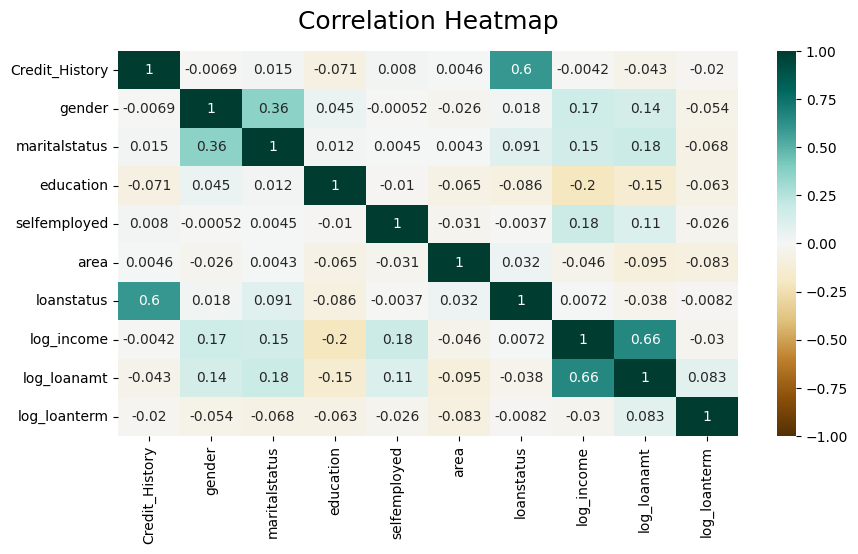

In [27]:
fig, ax = plt.subplots(figsize=(10,5)) 
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16)
#plt.savefig('heatmapdata.png', dpi=300, bbox_inches='tight')

The loan status is highly dependent on the credit history.